# Exploratory Data Analysis for Dengue AI Project
Data source: https://www.drivendata.org/competitions/44/dengai-predicting-disease-spread/data/ <BR>
Features: https://www.drivendata.org/competitions/44/dengai-predicting-disease-spread/page/82/

In [1]:
import scipy as sp
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import statsmodels as stats
from sklearn.preprocessing import MinMaxScaler, StandardScaler
%matplotlib inline
import myutil_dviz as myutil
import warnings
warnings.filterwarnings('ignore')
import sys
print(sys.executable)

/Users/carlos2/anaconda/envs/dsdht/bin/python


In [2]:
import importlib
_ = importlib.reload(myutil)

## Get data and take first look at dataset

In [3]:
dfx_train = myutil.get_indexed_dataset('data/dengue_features_train.csv')
dfy_train = myutil.get_indexed_dataset('data/dengue_labels_train.csv')
dftrain = myutil.set_index(pd.merge(dfx_train, dfy_train))
dftrain.head()

,city,year,weekofyear,week_start_date,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,...,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm,total_cases
yearweekofyear,,,,,,,,,,,,,,,,,,,,,
199018,sj,1990,18,1990-04-30,0.122600,0.103725,0.198483,0.177617,12.42,297.572857,...,73.365714,12.42,14.012857,2.628571,25.442857,6.900000,29.4,20.0,16.0,4
199019,sj,1990,19,1990-05-07,0.169900,0.142175,0.162357,0.155486,22.82,298.211429,...,77.368571,22.82,15.372857,2.371429,26.714286,6.371429,31.7,22.2,8.6,5
199020,sj,1990,20,1990-05-14,0.032250,0.172967,0.157200,0.170843,34.54,298.781429,...,82.052857,34.54,16.848571,2.300000,26.714286,6.485714,32.2,22.8,41.4,4
199021,sj,1990,21,1990-05-21,0.128633,0.245067,0.227557,0.235886,15.36,298.987143,...,80.337143,15.36,16.672857,2.428571,27.471429,6.771429,33.3,23.3,4.0,3
199022,sj,1990,22,1990-05-28,0.196200,0.262200,0.251200,0.247340,7.52,299.518571,...,80.460000,7.52,17.210000,3.014286,28.942857,9.371429,35.0,23.9,5.8,6


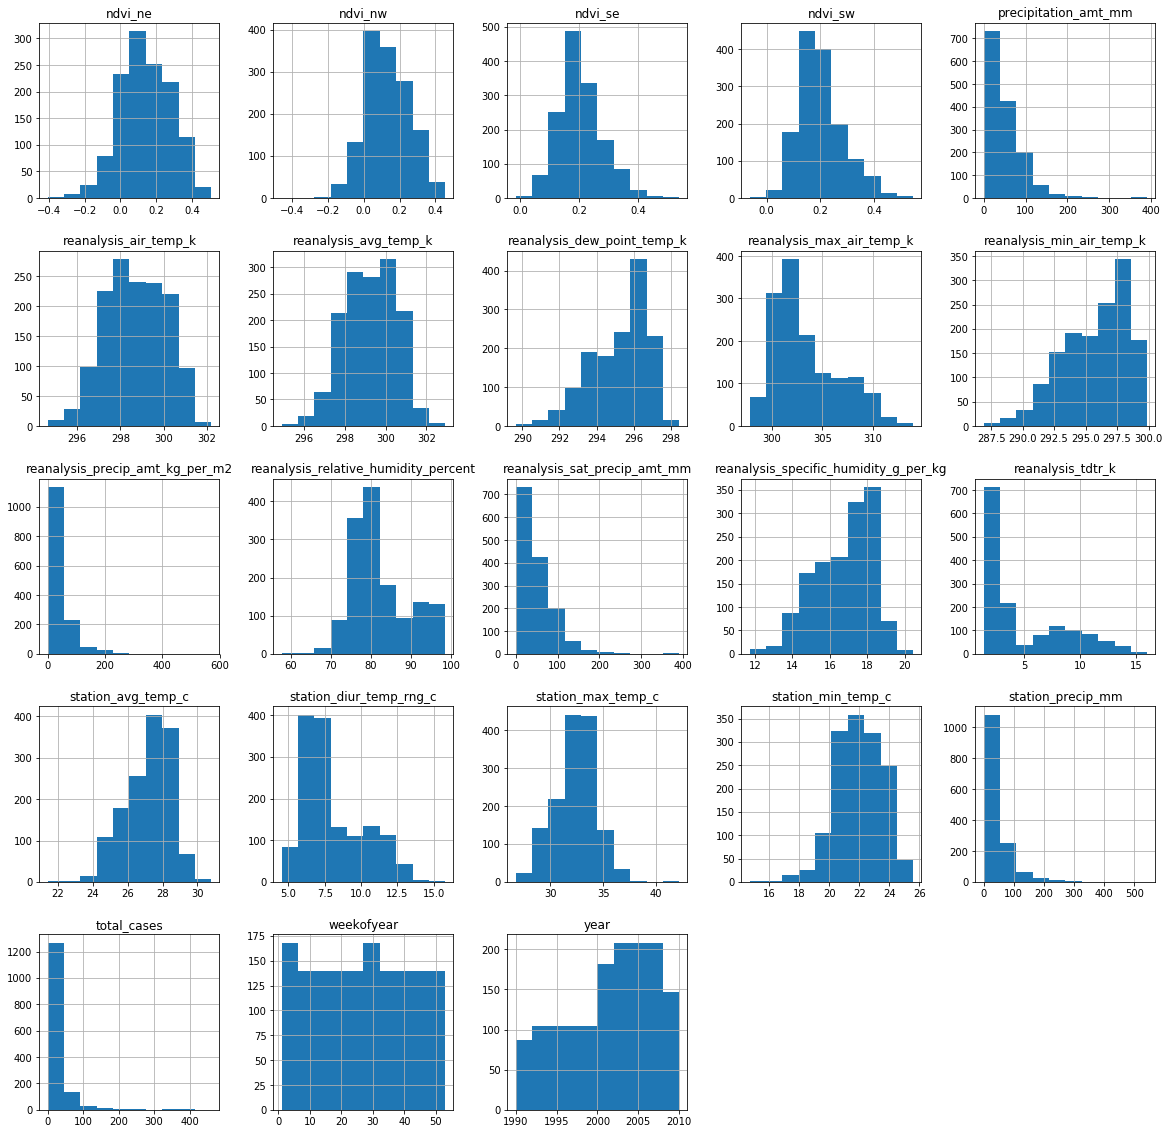

In [4]:
_ = dftrain.hist(bins=10, figsize=(20,20))

In [5]:
dftrain.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1456 entries, 199018 to 201025
Data columns (total 25 columns):
city                                     1456 non-null object
year                                     1456 non-null int64
weekofyear                               1456 non-null int64
week_start_date                          1456 non-null object
ndvi_ne                                  1262 non-null float64
ndvi_nw                                  1404 non-null float64
ndvi_se                                  1434 non-null float64
ndvi_sw                                  1434 non-null float64
precipitation_amt_mm                     1443 non-null float64
reanalysis_air_temp_k                    1446 non-null float64
reanalysis_avg_temp_k                    1446 non-null float64
reanalysis_dew_point_temp_k              1446 non-null float64
reanalysis_max_air_temp_k                1446 non-null float64
reanalysis_min_air_temp_k                1446 non-null float64
reanalysis_prec

## Deal with NaN on both training and test datasets together

In [6]:
dftrain.isnull().sum()

city                                       0
year                                       0
weekofyear                                 0
week_start_date                            0
ndvi_ne                                  194
ndvi_nw                                   52
ndvi_se                                   22
ndvi_sw                                   22
precipitation_amt_mm                      13
reanalysis_air_temp_k                     10
reanalysis_avg_temp_k                     10
reanalysis_dew_point_temp_k               10
reanalysis_max_air_temp_k                 10
reanalysis_min_air_temp_k                 10
reanalysis_precip_amt_kg_per_m2           10
reanalysis_relative_humidity_percent      10
reanalysis_sat_precip_amt_mm              13
reanalysis_specific_humidity_g_per_kg     10
reanalysis_tdtr_k                         10
station_avg_temp_c                        43
station_diur_temp_rng_c                   43
station_max_temp_c                        20
station_mi

In [7]:
# all nan values will be replaced with the mean for the week of the year
dftrain = myutil.set_nan_to_week_mean(dftrain.copy())
dftrain.isnull().sum()

city                                     0
year                                     0
weekofyear                               0
week_start_date                          0
ndvi_ne                                  0
ndvi_nw                                  0
ndvi_se                                  0
ndvi_sw                                  0
precipitation_amt_mm                     0
reanalysis_air_temp_k                    0
reanalysis_avg_temp_k                    0
reanalysis_dew_point_temp_k              0
reanalysis_max_air_temp_k                0
reanalysis_min_air_temp_k                0
reanalysis_precip_amt_kg_per_m2          0
reanalysis_relative_humidity_percent     0
reanalysis_sat_precip_amt_mm             0
reanalysis_specific_humidity_g_per_kg    0
reanalysis_tdtr_k                        0
station_avg_temp_c                       0
station_diur_temp_rng_c                  0
station_max_temp_c                       0
station_min_temp_c                       0
station_pre

In [8]:
dfcorr = dftrain.drop(['city','year','weekofyear','week_start_date','total_cases'], axis=1)
dfcorr.corr()

,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,reanalysis_avg_temp_k,reanalysis_dew_point_temp_k,reanalysis_max_air_temp_k,reanalysis_min_air_temp_k,reanalysis_precip_amt_kg_per_m2,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm
ndvi_ne,1.000000,0.771673,0.537961,0.597392,0.176266,-0.284662,-0.010562,0.067263,0.588682,-0.558167,0.179516,0.418918,0.176266,0.101666,0.620282,0.185437,0.578936,0.447749,-0.270618,0.182700
ndvi_nw,0.771673,1.000000,0.548051,0.643458,0.187316,-0.310743,-0.029237,0.066539,0.597886,-0.578570,0.189507,0.445816,0.187316,0.102726,0.636044,0.193846,0.601582,0.475933,-0.292815,0.207281
ndvi_se,0.537961,0.548051,1.000000,0.821131,0.076810,-0.157734,0.051545,0.003583,0.467500,-0.408207,0.036271,0.216306,0.076810,0.029684,0.485940,0.084468,0.430042,0.290227,-0.250420,0.131009
ndvi_sw,0.597392,0.643458,0.821131,1.000000,0.127784,-0.227038,0.024403,0.023084,0.547480,-0.494690,0.104145,0.313066,0.127784,0.055984,0.570609,0.120806,0.527717,0.377184,-0.292051,0.155407
precipitation_amt_mm,0.176266,0.187316,0.076810,0.127784,1.000000,-0.015489,0.109539,0.437154,0.286147,-0.120736,0.482800,0.501714,1.000000,0.453676,0.204426,0.230591,0.188962,0.294158,0.076970,0.481325
reanalysis_air_temp_k,-0.284662,-0.310743,-0.157734,-0.227038,-0.015489,1.000000,0.901448,0.529551,0.000062,0.735938,-0.127552,-0.400926,-0.015489,0.508115,-0.278771,0.600093,-0.240109,0.226647,0.715197,-0.170017
reanalysis_avg_temp_k,-0.010562,-0.029237,0.051545,0.024403,0.109539,0.901448,1.000000,0.615166,0.400187,0.434822,-0.029807,-0.165475,0.109539,0.613400,0.126702,0.734887,0.118599,0.511708,0.576563,-0.043203
reanalysis_dew_point_temp_k,0.067263,0.066539,0.003583,0.023084,0.437154,0.529551,0.615166,1.000000,0.260705,0.359407,0.434447,0.555252,0.437154,0.997054,-0.029650,0.721222,0.041211,0.491252,0.645882,0.237896
reanalysis_max_air_temp_k,0.588682,0.597886,0.467500,0.547480,0.286147,0.000062,0.400187,0.260705,1.000000,-0.600912,0.194716,0.402495,0.286147,0.303630,0.918876,0.464153,0.814264,0.763356,-0.191540,0.252309
reanalysis_min_air_temp_k,-0.558167,-0.578570,-0.408207,-0.494690,-0.120736,0.735938,0.434822,0.359407,-0.600912,1.000000,-0.106799,-0.411413,-0.120736,0.316110,-0.815313,0.202749,-0.685928,-0.272457,0.716125,-0.236916


## Analysis of temperature data

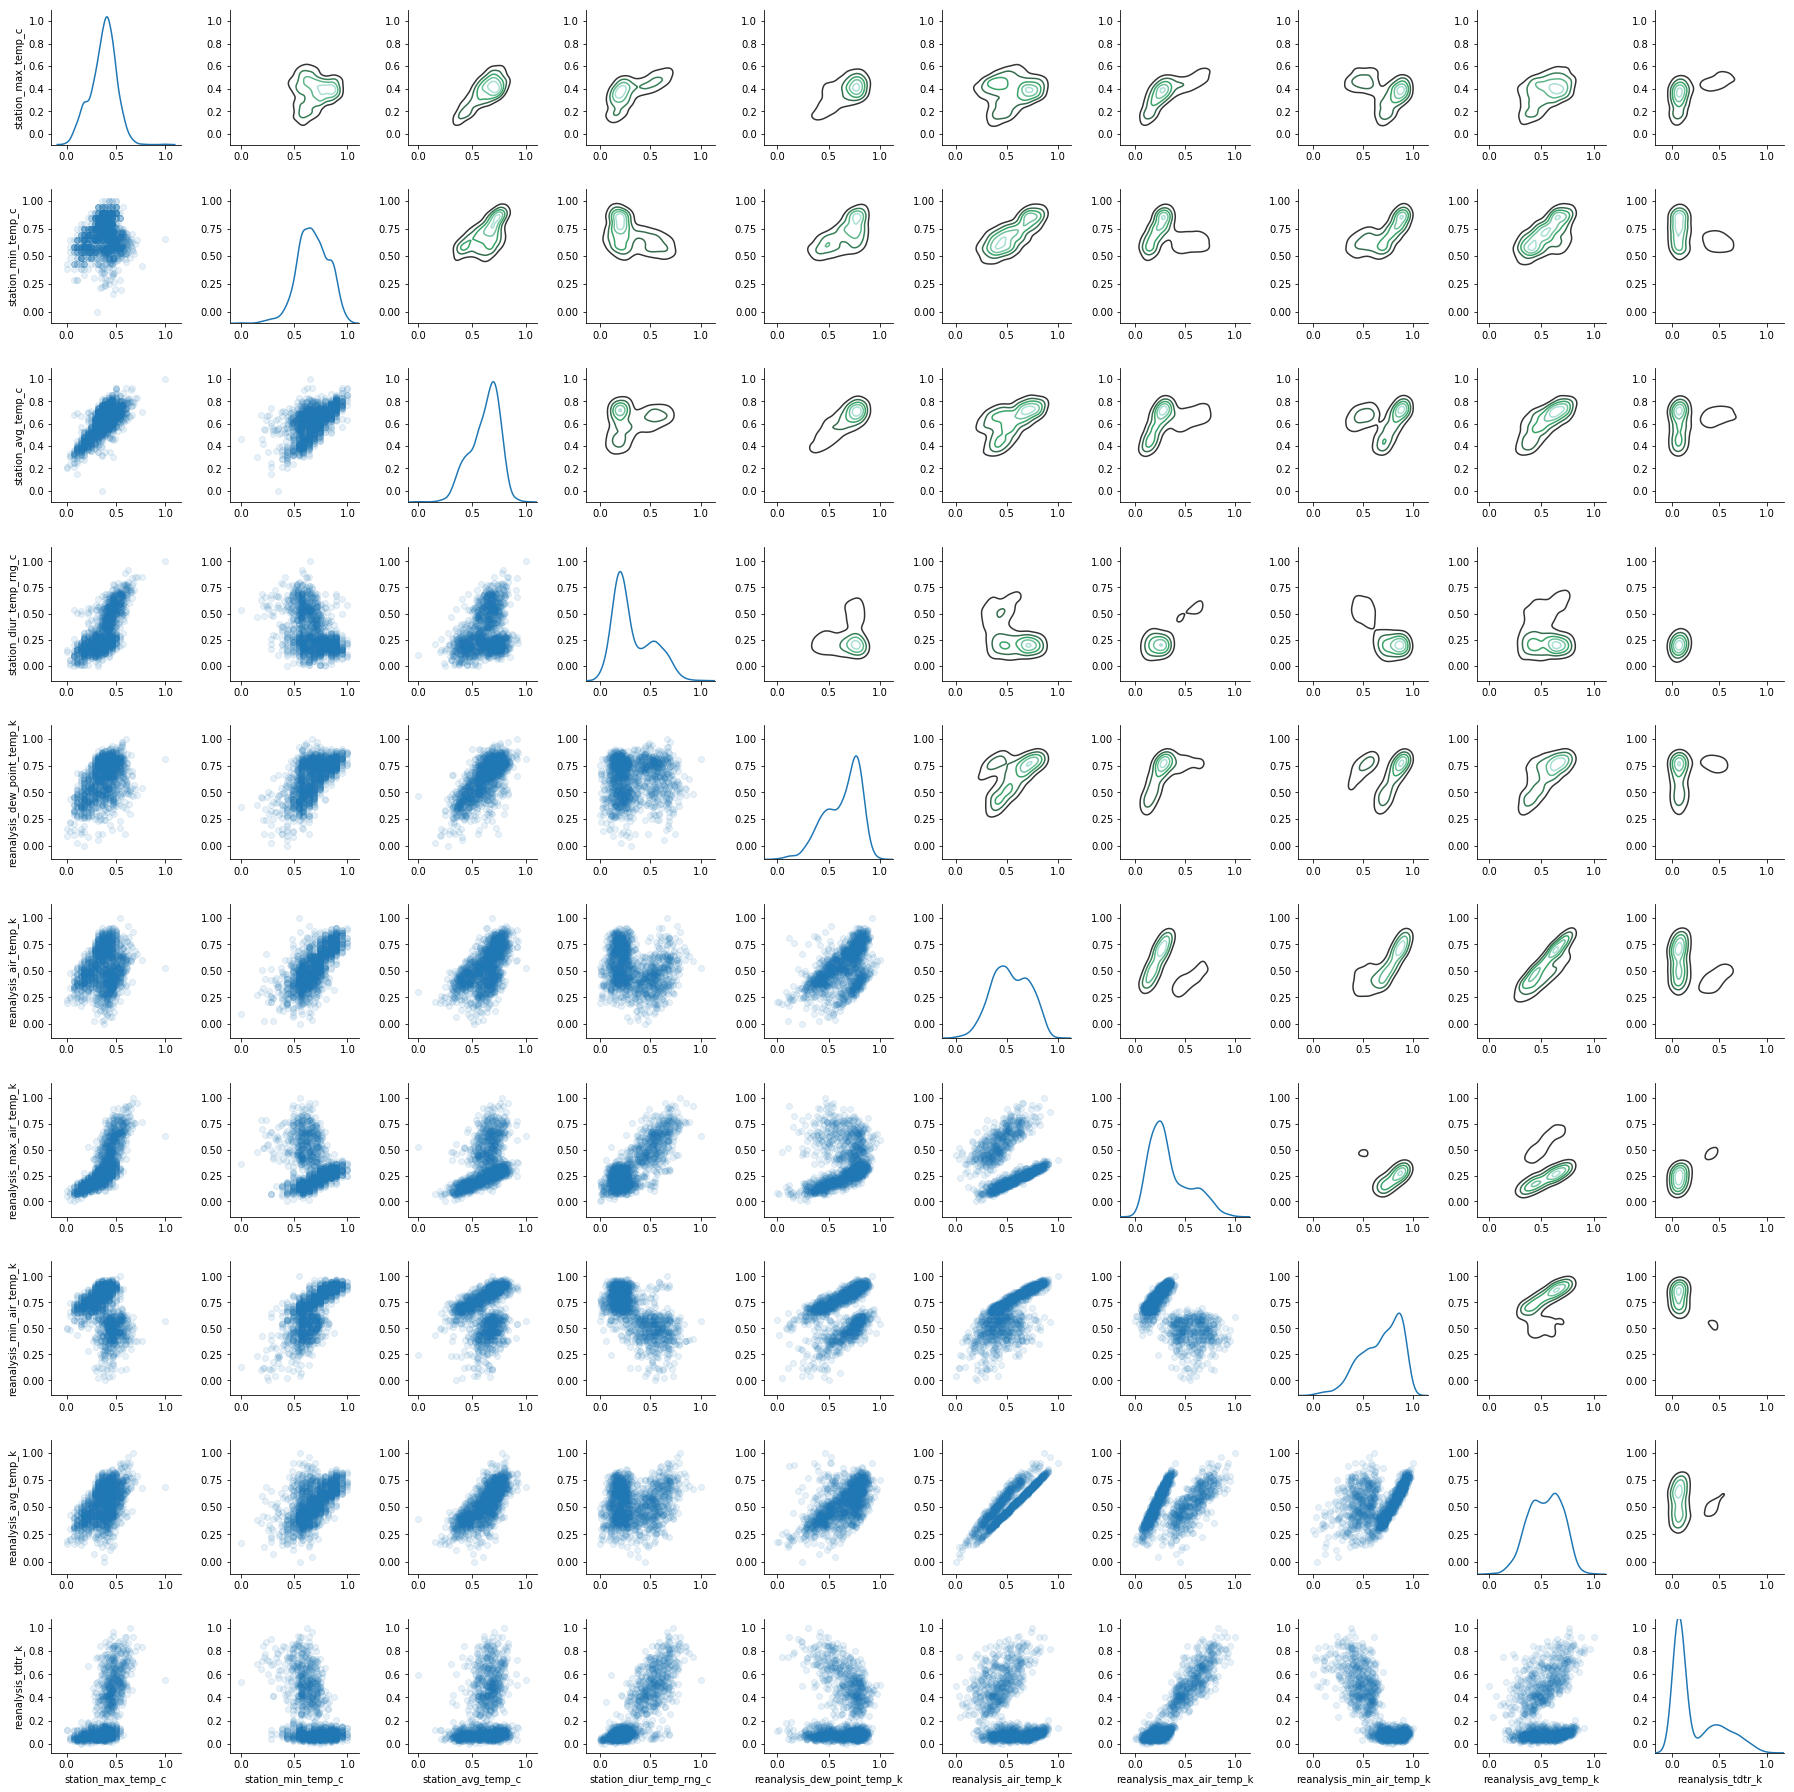

In [9]:
#columns = ['station_max_temp_c','station_min_temp_c','station_avg_temp_c','station_precip_mm',\
#           'station_diur_temp_rng_c','total_cases']

columns = ['station_max_temp_c', 'station_min_temp_c', 'station_avg_temp_c', 'station_diur_temp_rng_c',\
           'reanalysis_dew_point_temp_k', 'reanalysis_air_temp_k', 'reanalysis_max_air_temp_k',\
           'reanalysis_min_air_temp_k', 'reanalysis_avg_temp_k', 'reanalysis_tdtr_k']

x = dftrain[columns].values.astype('float32')
scaler = MinMaxScaler(feature_range=(0,1))
x_scaled = scaler.fit_transform(x)
df = pd.DataFrame(x_scaled, columns=columns)

g = sns.PairGrid(df)
g.map_diag(sns.kdeplot)
g.map_lower(plt.scatter, alpha=0.1)
_ = g.map_upper(sns.kdeplot, n_levels=5)

In [10]:
df.corr()

,station_max_temp_c,station_min_temp_c,station_avg_temp_c,station_diur_temp_rng_c,reanalysis_dew_point_temp_k,reanalysis_air_temp_k,reanalysis_max_air_temp_k,reanalysis_min_air_temp_k,reanalysis_avg_temp_k,reanalysis_tdtr_k
station_max_temp_c,1.000000,0.139055,0.750043,0.693723,0.491252,0.226647,0.763356,-0.272456,0.511708,0.613499
station_min_temp_c,0.139055,1.000000,0.602976,-0.424992,0.645882,0.715197,-0.191540,0.716125,0.576563,-0.448113
station_avg_temp_c,0.750043,0.602976,1.000000,0.309967,0.721223,0.600093,0.464153,0.202749,0.734887,0.217010
station_diur_temp_rng_c,0.693723,-0.424992,0.309967,1.000000,0.041211,-0.240108,0.814264,-0.685928,0.118600,0.853595
reanalysis_dew_point_temp_k,0.491252,0.645882,0.721223,0.041211,1.000000,0.529551,0.260705,0.359407,0.615167,-0.029650
reanalysis_air_temp_k,0.226647,0.715197,0.600093,-0.240108,0.529551,1.000000,0.000062,0.735938,0.901448,-0.278771
reanalysis_max_air_temp_k,0.763356,-0.191540,0.464153,0.814264,0.260705,0.000062,1.000000,-0.600912,0.400188,0.918876
reanalysis_min_air_temp_k,-0.272456,0.716125,0.202749,-0.685928,0.359407,0.735938,-0.600912,1.000000,0.434822,-0.815313
reanalysis_avg_temp_k,0.511708,0.576563,0.734887,0.118600,0.615167,0.901448,0.400188,0.434822,1.000000,0.126702
reanalysis_tdtr_k,0.613499,-0.448113,0.217010,0.853595,-0.029650,-0.278771,0.918876,-0.815313,0.126702,1.000000


## Analysis of precipitation data

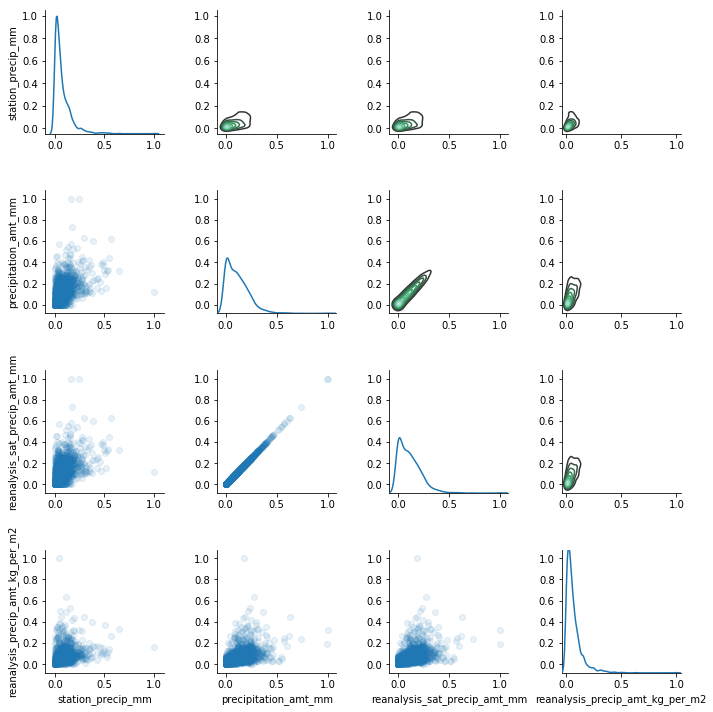

In [11]:
columns = ['station_precip_mm', 'precipitation_amt_mm', 'reanalysis_sat_precip_amt_mm',\
           'reanalysis_precip_amt_kg_per_m2']

x = dftrain[columns].values.astype('float32')
scaler = MinMaxScaler(feature_range=(0,1))
x_scaled = scaler.fit_transform(x)
df = pd.DataFrame(x_scaled, columns=columns)

g = sns.PairGrid(df)
g.map_diag(sns.kdeplot)
g.map_lower(plt.scatter, alpha=0.1)
_ = g.map_upper(sns.kdeplot, n_levels=10)

In [12]:
df.corr()

,station_precip_mm,precipitation_amt_mm,reanalysis_sat_precip_amt_mm,reanalysis_precip_amt_kg_per_m2
station_precip_mm,1.000000,0.481325,0.481325,0.345681
precipitation_amt_mm,0.481325,1.000000,1.000000,0.482800
reanalysis_sat_precip_amt_mm,0.481325,1.000000,1.000000,0.482800
reanalysis_precip_amt_kg_per_m2,0.345681,0.482800,0.482800,1.000000


## Analysis of humidity data 

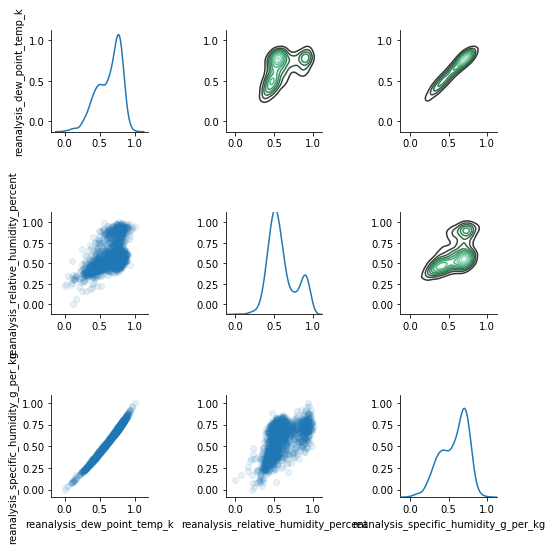

In [13]:
columns = ['reanalysis_dew_point_temp_k', 'reanalysis_relative_humidity_percent',\
           'reanalysis_specific_humidity_g_per_kg']

x = dftrain[columns].values.astype('float32')
scaler = MinMaxScaler(feature_range=(0,1))
x_scaled = scaler.fit_transform(x)
df = pd.DataFrame(x_scaled, columns=columns)

g = sns.PairGrid(df)
g.map_diag(sns.kdeplot)
g.map_lower(plt.scatter, alpha=0.1)
_ = g.map_upper(sns.kdeplot, n_levels=10)

In [14]:
df.corr()

,reanalysis_dew_point_temp_k,reanalysis_relative_humidity_percent,reanalysis_specific_humidity_g_per_kg
reanalysis_dew_point_temp_k,1.000000,0.555252,0.997054
reanalysis_relative_humidity_percent,0.555252,1.000000,0.579327
reanalysis_specific_humidity_g_per_kg,0.997054,0.579327,1.000000


## Analysis of location features

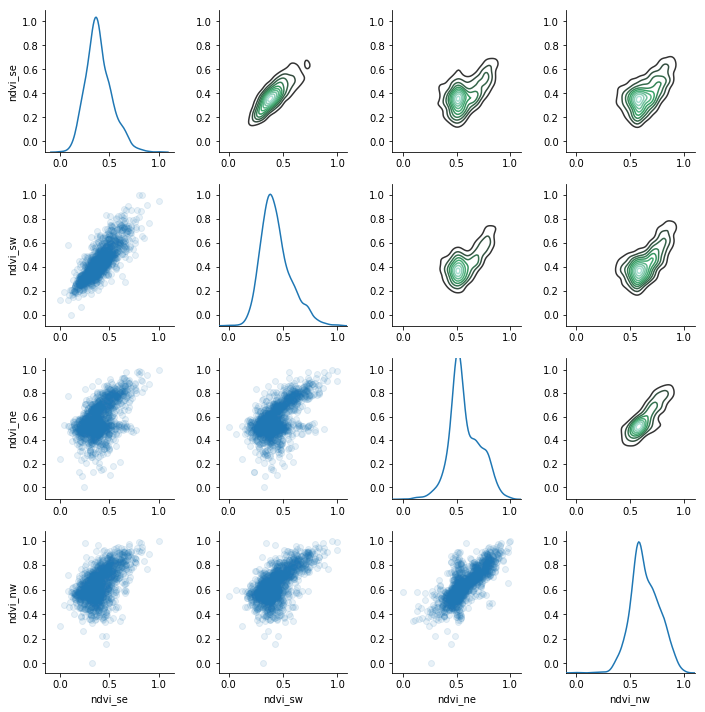

In [15]:
columns = ['ndvi_se', 'ndvi_sw', 'ndvi_ne', 'ndvi_nw']

x = dftrain[columns].values.astype('float32')
scaler = MinMaxScaler(feature_range=(0,1))
x_scaled = scaler.fit_transform(x)
df = pd.DataFrame(x_scaled, columns=columns)

g = sns.PairGrid(df)
g.map_diag(sns.kdeplot)
g.map_lower(plt.scatter, alpha=0.1)
_ = g.map_upper(sns.kdeplot, n_levels=10)

In [16]:
df.corr()

,ndvi_se,ndvi_sw,ndvi_ne,ndvi_nw
ndvi_se,1.000000,0.821131,0.537961,0.548051
ndvi_sw,0.821131,1.000000,0.597392,0.643458
ndvi_ne,0.537961,0.597392,1.000000,0.771673
ndvi_nw,0.548051,0.643458,0.771673,1.000000


## A closer look at total cases

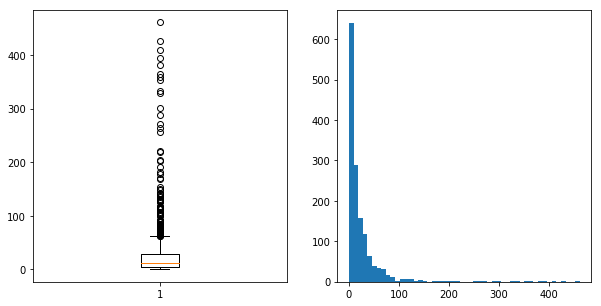

In [17]:
fig, ax = plt.subplots(1,2, figsize=(10,5))
plt.subplot(121)
_ = plt.boxplot(dftrain['total_cases'])
ax = plt.subplot(122)
_ = plt.hist(dftrain['total_cases'], bins=50)

In [18]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import IsolationForest
nrows = dftrain['total_cases'].values.shape[0]
test_arry = dftrain['total_cases'].values.reshape(nrows,1)
clf = IsolationForest(max_samples=nrows, random_state=42)
clf.fit(test_arry)
clf.predict(np.array([[79]]))
np.percentile(test_arry,95)

81.25

In [19]:
dftemp = dftrain.columns.copy().values
nrows = dftemp.shape[0]
clf = IsolationForest(max_samples=nrows, random_state=42)
clf.fit(test_arry)
clf.predict(np.array([[79]]))
np.percentile(test_arry,75)*1.5

42.0

## View data as time series

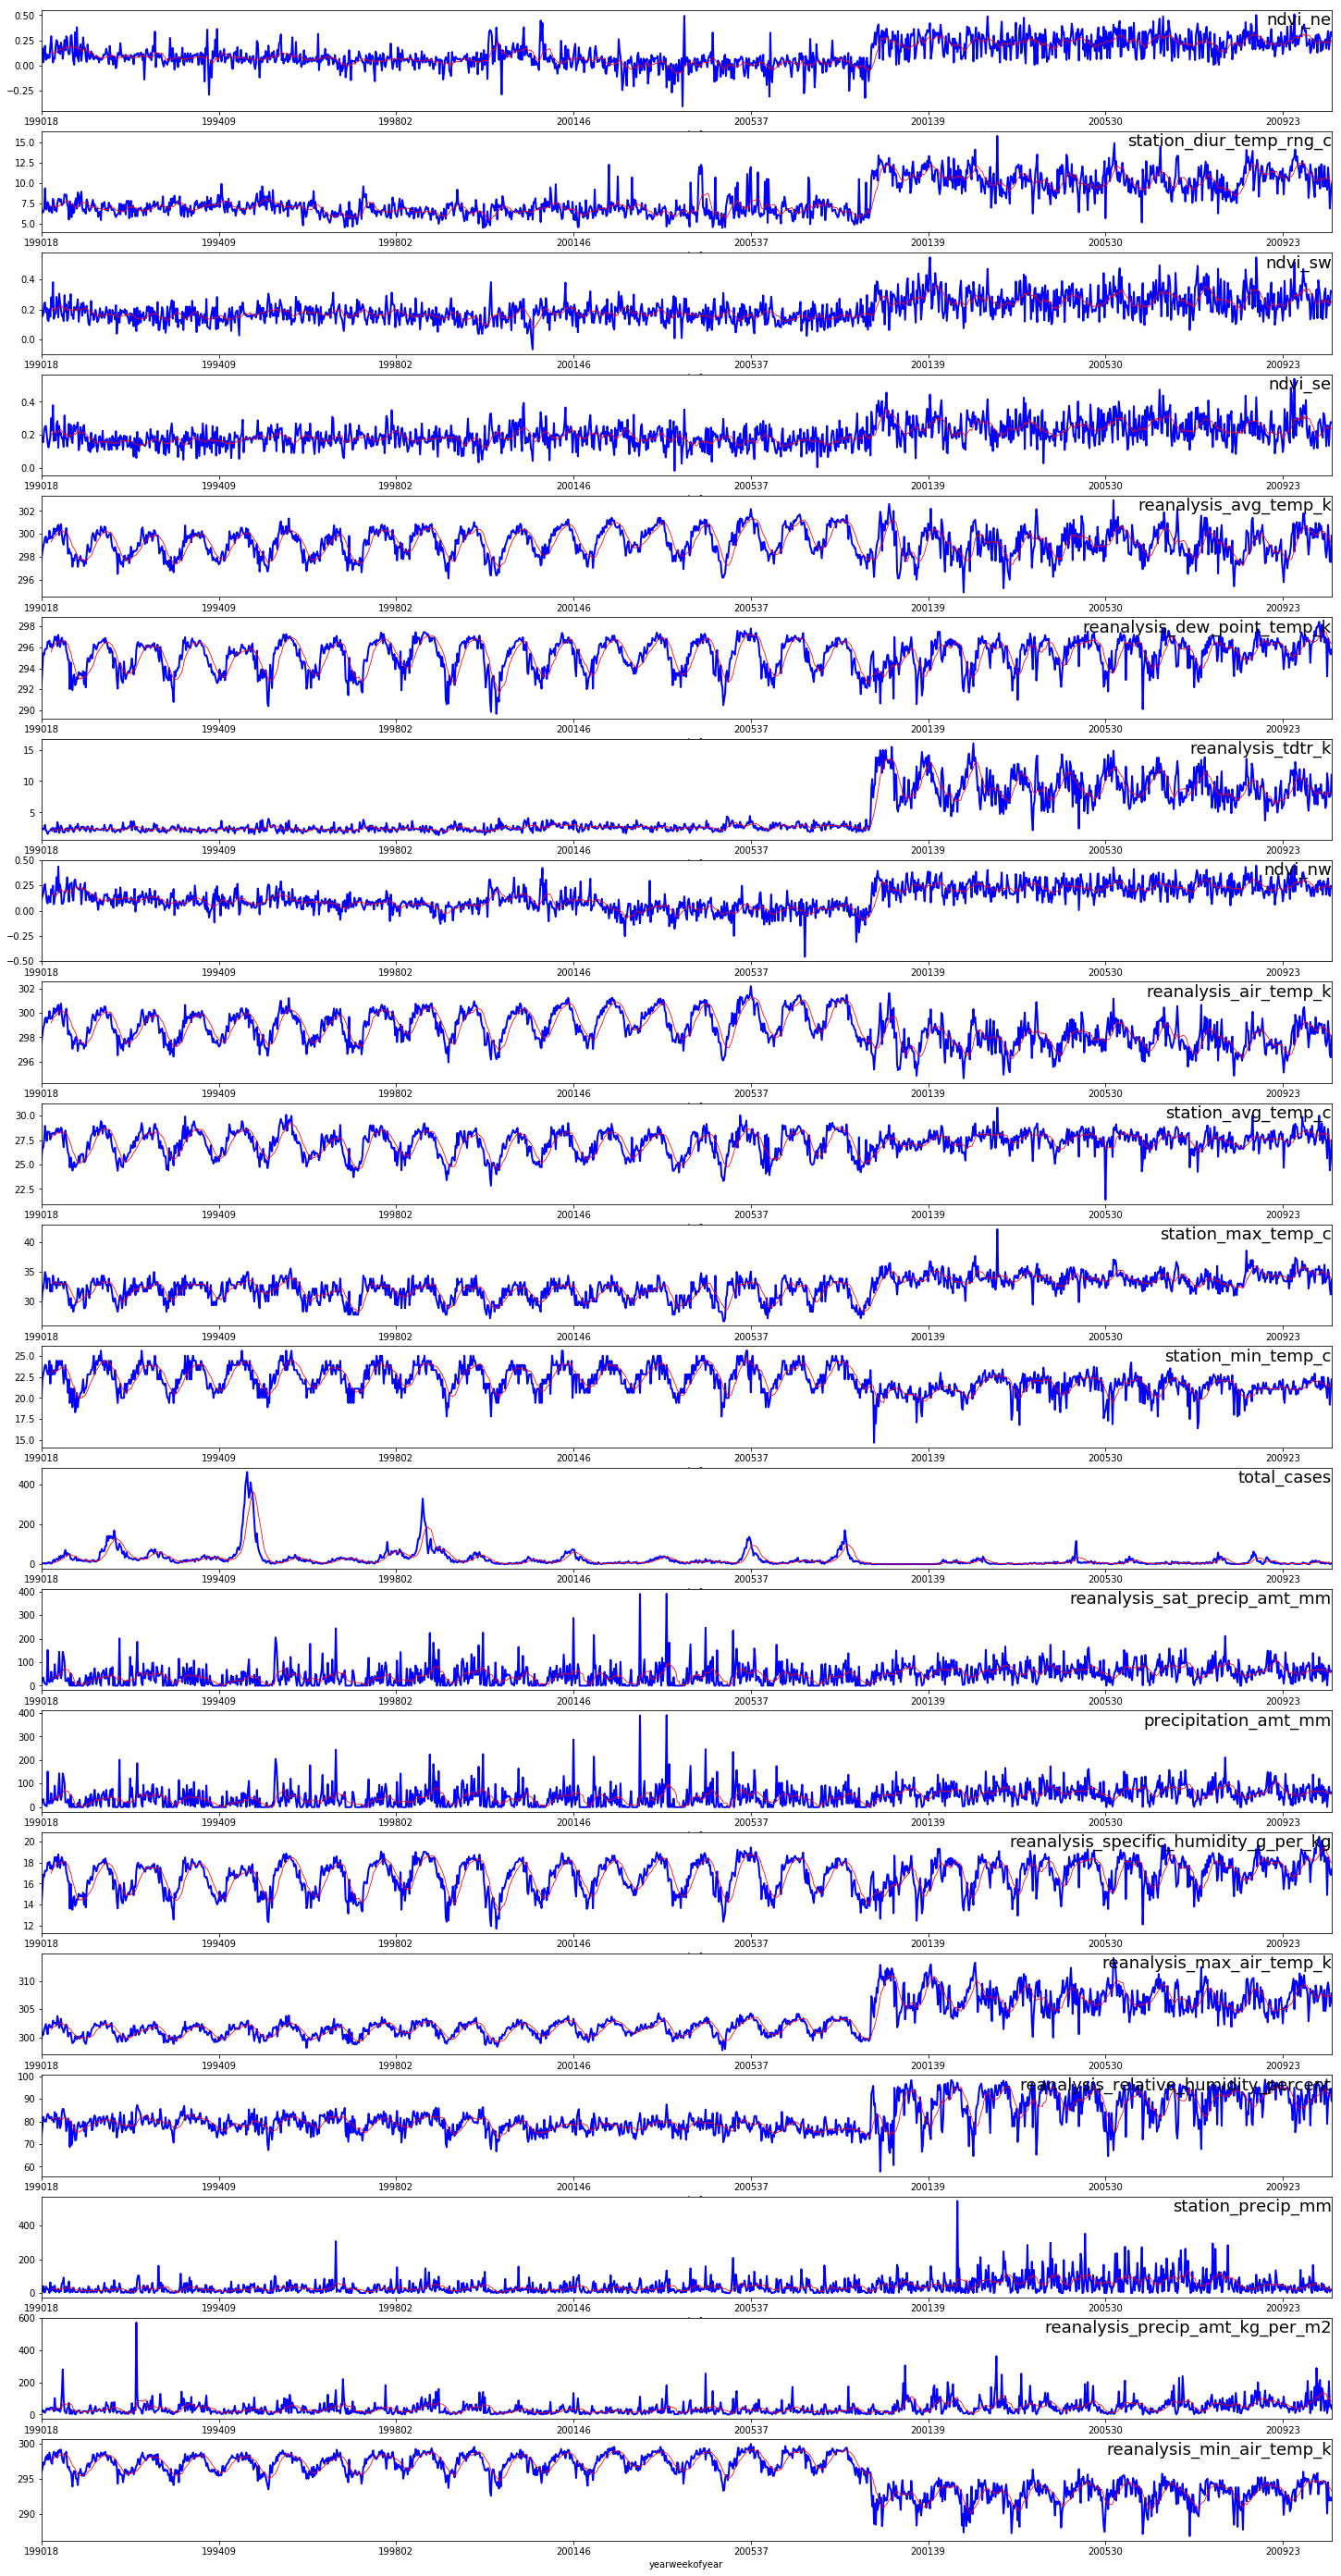

In [20]:
myutil.plot_cols2(dftrain)